# Calculating and plotting degassing paths

## Calculate degassing paths
A degassing path is a series of volatile concentrations both in the liquid and fluid that a magma will follow during decompression. In the calculation, the saturation pressure is computed, and then the system is equilibrated along a trajectory of decreasing pressure values at steps of 100 bars (or 10 bars if the starting pressure is <500 bars). If so desired, this calculation can be performed for any initial pressure, but the default is the saturation pressure. If a pressure is specified that is above the saturation pressure, the calculation will simlpy proceed from the saturation pressure, since the magma cannot degas until it reaches saturation. 

Completely open-system, completely closed-system or partially open-system degassing paths can be calculated by specifying what proportion of the fluid to fractionate. The fluid fractionation value can range between 0 (closed-system: no fluid is removed, all is retained at each pressure step) and 1 (open-system: all fluid is removed, none is retained at each pressure step). Closed and partially open-system runs allow the user to speficy the initial presence of exsolved fluid that is in equilirium with the melt at the starting pressure.

**Method structure:**<br>
>*Only single-sample calculations.* `def calculate_degassing_path(self, sample, temperature, pressure='saturation', fractionate_vapor=0.0, init_vapor=0.0).result`

**Required inputs:**<br>
>`sample`: The sample composition, as a dictionary with values in wt%

>`temperature`: The temperature in $^{\circ}$C. 

**Optional inputs:**<br>
>`pressure`: The perssure at which to begin the degassing calculations, in bars. Default value is 'saturation', which runs the calculation with the initial pressure at the saturation pressure. If a pressure greater than the saturation pressure is input, the calculation will start at saturation, since this is the first pressure at which any degassing will occur.

>`fractionate_vapor`: Proportion of vapor removed at each pressure step. Default value is 0.0 (completely closed-system degassing). Specifies the type of calculation performed, either closed system (0.0) or open system (1.0) degassing. If any value between <1.0 is chosen, user can also specify the 'init_vapor' argument (see below). A value in between 0 and 1 will remove that proportion of vapor at each step. For example, for a value of 0.2, the calculation will remove 20% of the vapor and retain 80% of the vapor at each pressure step.

>`init_vapor`: Default value is 0.0. Specifies the amount of vapor (in wt%) coexisting with the melt before degassing.

**Calculated outputs:** 
>The function returns a pandas DataFrame with columns as: 'Pressure_bars', 'H2O_liq' and 'CO2_liq' (the concentration of H$_2$O and CO$_2$ in the liquid, in wt%), 'XH2O_fl' and 'XCO2_fl' (the composition of the H$_2$O-CO$_2$ fluid, in mol fraction), and 'FluidProportion_wt' (the proportion of fluid in the fluid-melt system, in wt%).

In [1]:
import sys
sys.path.insert(0, '../')

import VESIcal as v

/opt/anaconda3/lib/python3.9/site-packages/numdifftools/extrapolation.py:10: DeprecationWarning: Please use `convolve1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve1d
/opt/anaconda3/lib/python3.9/site-packages/numdifftools/multicomplex.py:35: DeprecationWarning: `finfo.machar` is deprecated (NumPy 1.22)
  _TINY = np.finfo(float).machar.tiny


### Import an Excel file and extract a single sample

In [2]:
myfile = v.BatchFile('../../manuscript/example_data.xlsx')
SampleName = 'BT-ex'
extracted_bulk_comp = myfile.get_sample_composition(SampleName, asSampleClass=True)

### Open system degassing calculation

In [3]:
open_df = v.calculate_degassing_path(sample=extracted_bulk_comp, temperature=900.0, fractionate_vapor=1.0).result

[===============     ] 79% Calculating degassing path...

2024-03-28 17:19:54.515 python[15423:7581456] Error for element H  is 2e-06
2024-03-28 17:19:54.515 python[15423:7581456] Error for element C  is 5.84627e-17
2024-03-28 17:19:54.515 python[15423:7581456] Error for element O  is 1e-06
2024-03-28 17:19:54.515 python[15423:7581456] Error for element Na is 0
2024-03-28 17:19:54.515 python[15423:7581456] Error for element Mg is 0
2024-03-28 17:19:54.515 python[15423:7581456] Error for element Al is 0
2024-03-28 17:19:54.515 python[15423:7581456] Error for element Si is 0
2024-03-28 17:19:54.515 python[15423:7581456] Error for element K  is 0
2024-03-28 17:19:54.515 python[15423:7581456] Error for element Ca is 0
2024-03-28 17:19:54.515 python[15423:7581456] Error for element Ti is 0
2024-03-28 17:19:54.515 python[15423:7581456] Error for element Fe is 0


[====================] 100% Calculating degassing path...


### Closed system degassing calculation

In [4]:
closed_df = v.calculate_degassing_path(sample=extracted_bulk_comp, temperature=900.0).result

[====================] 100% Calculating degassing path...


### Partially closed system degassing calculation
Here we will fractionate 50% of the fluid produced at each calculation step.

In [5]:
half_df = v.calculate_degassing_path(sample=extracted_bulk_comp, temperature=900.0, fractionate_vapor=0.5).result

[====================] 100% Calculating degassing path...


### Closed system with initial fluid
Here we will calculate a closed system degassing path where the initial magma contains 2 wt% exsolved fluid.

In [6]:
exsolved_df = v.calculate_degassing_path(sample=extracted_bulk_comp, temperature=900.0, init_vapor=2.0).result

[====================] 100% Calculating degassing path...


### Calculate from initial pressure below saturation
By default, degassing paths are calculated from the computed saturation pressure for the sample. The user can instead pass their own pressure. If the user supplied pressure is below the saturation pressure computed by the model, the degassing path will be computed from the user supplied pressure.

In [7]:
start2000_df = v.calculate_degassing_path(sample=extracted_bulk_comp, temperature=900.0, pressure=2000.0).result

[====================] 100% Calculating degassing path...


## Plotting degassing paths
Once degassing paths are calcualted, they may be easily plotted using VESIcal's built in `plot_degassing_paths` method. The user can plot multiple degassing paths on one plot. Optionally, labels in the plot legend can be specified.

**Method structure:**<br>
>`def plot_degassing_paths(degassing_paths, labels=None)`

**Required inputs:**<br>
>`degassing_paths`: A list of DataFrames with degassing information as generated by calculate_degassing_path().

**Optional inputs:**<br>
>`labels`: Labels for the plot legend. Default is None, in which case each plotted line will be given the generic legend name of "Pathn", with n referring to the nth degassing path passed. The user can pass their own labels as a list of strings.

**Calculated outputs:** 
>The function returns a matplotlib object with the x-axis as H$_2$O, wt% and the y-axis as CO$_2$, wt%. All degassing paths passed are plotted on one figure.

### Plotting degassig paths from saturation pressure

(<Figure size 864x576 with 1 Axes>,
 <Axes: xlabel='H$_2$O wt%', ylabel='CO$_2$ wt%'>)

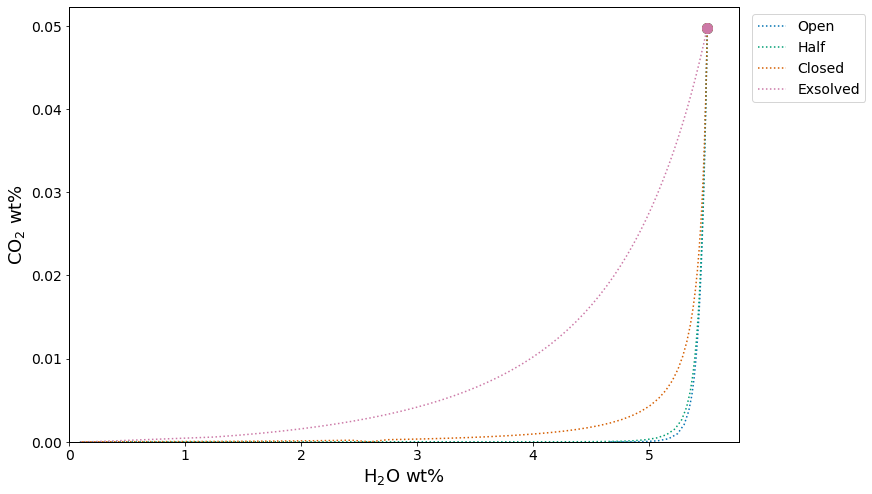

In [8]:
v.plot(degassing_paths=[open_df, half_df, closed_df, exsolved_df],
       degassing_path_labels=["Open", "Half", "Closed", "Exsolved"])

### Plotting degassing path from 2000 bars

(<Figure size 864x576 with 1 Axes>,
 <Axes: xlabel='H$_2$O wt%', ylabel='CO$_2$ wt%'>)

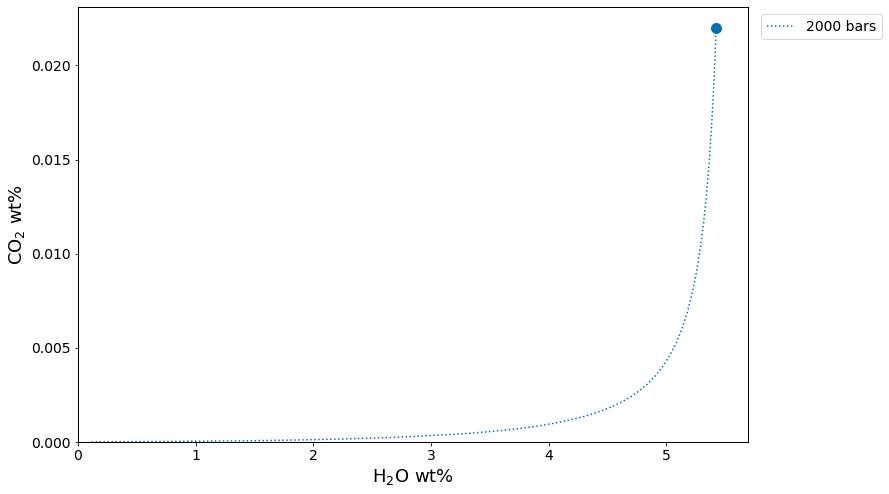

In [9]:
v.plot(degassing_paths = [start2000_df],
       degassing_path_labels=["2000 bars"])